***
### **Chapter 4   <a class="anchor" id="4.0"></a>**
### **Why the pandas DataFrame?**

### Keep your dataframe as a dataframe for as long as you can

This is the second cardinal rule for cleaning data with pandas. The Pandas DataFrame is one of the most convenient and versatile objects in your python toolbelt, and you shouldn't stray from it unless you have good reason to. To illustrate this, we'll take a look at the pitch_percent variable we noticed contained some outliers. You may be temped to simply take the values from the pitch_percent column and convert them to a list and sort them like so:

In [89]:
#create list of values for pitch percent and sort

pitch_per = df_knn["pitch_percent"]
listpitch_per = list(pitch_per)
listpitch_per.sort()
print(listpitch_per)

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6,

We see those last two values are much higher than the others. Does that make them invalid? We have no idea.

### The status of a data point as an outlier is strongly reliant upon its context.

Was the player who hit at such a high percentage a pitcher or other player who gets very few at bats? How many home runs did they account for as a proportion of the total home runs in 2018? 

If you want to pair the name of the player with pitch_percent, you may think to use a dictionary. However, as the following code demonstrates, you lose the ability to sort the data when you do this and have to twist its arm to get it to work:

In [90]:
# create dictionary for pitch_percent
pitch_percent = dict(zip(df_knn.player_name,df_knn.pitch_percent))

# sort and print the dictionary using lambda function
sorted_pitch_percent = sorted(pitch_percent.items(), key=lambda x: x[1], reverse=True)
print(sorted_pitch_percent)

[('A.J. Cole', 8.3), ('Ryder Jones', 6.3), ('Brandon Woodruff', 3.3), ('Michael Lorenzen', 3.1), ('Ryan Schimpf', 2.9), ('Myles Straw', 2.5), ('Luke Voit', 2.2), ('Nolan Fontana', 2.1), ('Trevor Plouffe', 2.0), ('Khris Davis', 1.9), ('Lane Adams', 1.9), ('Matt Skole', 1.9), ("Travis d'Arnaud", 1.8), ('J.D. Martinez', 1.7), ('Joey Gallo', 1.7), ('Max Muncy', 1.7), ('Matt Adams', 1.7), ("Ryan O'Hearn", 1.7), ('Franklin Barreto', 1.7), ('Patrick Wisdom', 1.7), ('Ildemaro Vargas', 1.7), ('Nelson Cruz', 1.6), ('David Dahl', 1.6), ("Tyler O'Neill", 1.6), ('Francisco Arcia', 1.6), ('DJ Stewart', 1.6), ('Reese McGuire', 1.6), ('Adam Rosales', 1.6), ('Mike Trout', 1.5), ('Nolan Arenado', 1.5), ('Manny Machado', 1.5), ('Javier Baez', 1.5), ('Daniel Palka', 1.5), ('Hunter Renfroe', 1.5), ('Evan Gattis', 1.5), ('Shohei Ohtani', 1.5), ('Tyler Austin', 1.5), ('Yoenis Cespedes', 1.5), ('Pedro Alvarez', 1.5), ('Aramis Garcia', 1.5), ('Rowdy Tellez', 1.5), ('John Gant', 1.5), ('Trevor Story', 1.4), ('C

There you have it! You can now see that A.J Cole and Ryder Jones are the two who represent the outliers for pitch_percent. A quick google search reveals that the two outlier players had a total of 11 at bats between them. However, your data is now in a list of tuples, a datatype which is immutable, and this method was unnecessarily complicated. We'll show next how much easier and more versatile these operations are with the pandas DataFrames.

***
### Some pandas DataFrame Operations  <a class="anchor" id="4.1"></a>

Back to the outlier example for pitch_percentage: What exactly is pitch percent? Is it percentage of balls hit for home runs opposed to total pitches seen? Or is it something else?

### Always properly label your data
One thing I cannot thank the folks over at Savant for is the lack of labeling for many of their statistics. Almost none of them have units, and many of the statistics are not explained at all in their reference guide. Thankfully, this gives us a chance to practice a few useful methods on pandas Dataframes!

First, we subset the DataFrame to just a few select variables. To do this, one can use the loc or iloc DataFrame methods.

In [91]:
# subset df_2 to just include columns we want

pitch_percent_df = df_knn.loc[:, ["player_name", "home_runs", "total_pitches", "pitch_percent"]]
pitch_percent_df.head(n = 10)

,player_name,home_runs,total_pitches,pitch_percent
0,Khris Davis,48,2514,1.9
1,J.D. Martinez,43,2519,1.7
2,Joey Gallo,40,2348,1.7
3,Jose Ramirez,39,3002,1.3
4,Mike Trout,39,2543,1.5
5,Nolan Arenado,38,2592,1.5
6,Francisco Lindor,38,2920,1.3
7,Giancarlo Stanton,38,2942,1.3
8,Manny Machado,37,2529,1.5
9,Nelson Cruz,37,2282,1.6


Next, we calculate what we suspect the pitch percent to be, which is:        \begin{equation*} \frac{pitches}{total pitches}* 100 \end{equation*}

Don't forget that home runs are currently labeled as pitches! We'll fix that a bit later.

In [92]:
#calculate pitch percent by dividing home runs by total pitches and multiplying by 100 

percentage = round( (pitch_percent_df["home_runs"]) / (pitch_percent_df["total_pitches"]) * 100, 1)

And with the beauty of DataFrames, we can easily append our calculated percentage to the end of the current dataframe by assigning the new series (a one-dimensional labeled array) to the current DataFrame with a new column name, 'percent':

In [93]:
pitch_percent_df["percent"] = percentage
pitch_percent_df.head(n = 20)

,player_name,home_runs,total_pitches,pitch_percent,percent
0,Khris Davis,48,2514,1.9,1.9
1,J.D. Martinez,43,2519,1.7,1.7
2,Joey Gallo,40,2348,1.7,1.7
3,Jose Ramirez,39,3002,1.3,1.3
4,Mike Trout,39,2543,1.5,1.5
5,Nolan Arenado,38,2592,1.5,1.5
6,Francisco Lindor,38,2920,1.3,1.3
7,Giancarlo Stanton,38,2942,1.3,1.3
8,Manny Machado,37,2529,1.5,1.5
9,Nelson Cruz,37,2282,1.6,1.6


Thankfully we see our percent column is equal to the pitch_percent column we were testing for outliers and our equation was correct! But what if we want to check analytically? Since we have them conveniently sitting in our dataframe, we can convert them to lists using the **tolist()** method and compare them in one quick line?

In [94]:
# compare two columns in pitch_percent_df as lists
pitch_percent_df["pitch_percent"].tolist() == pitch_percent_df["percent"].tolist()

False

What? False? But that doesn't seem right! We can use a list comprehension to compare the lists and see exactly what isn't equal. We could do this in one line, but it's always worth remembering that readability is crucial. If no one can read your code, it might as well be in another language!

In [95]:
# convert columns to lists
list1 = pitch_percent_df["pitch_percent"].tolist()
list2 = pitch_percent_df["percent"].tolist()

In [96]:
# list comprehension compares values from each list and returns the unequal values as well as the player they correspond to
[print("The values that are not equal are " + str(i) + " and " + str(j) + "! This corresponds to the player "  +  str(df_knn.loc[df_knn["pitch_percent"] == i, 'player_name'].item()) + "!" ) for i, j in zip(list1 , list2) if i != j]

The values that are not equal are 6.3 and 6.2! This corresponds to the player Ryder Jones!


[None]

Our old friend Ryder Jones strikes again! His single home run and lack of at bats caused a rounding error at Statcast! 

In [97]:
launch_angle_df = df_knn.loc[:, ["player_name", "launch_angle"]]
print(launch_angle_df.sort_values(by = ["launch_angle"], ascending = False).head(n=15))


           player_name  launch_angle
482         J.D. Davis          40.0
458       Nick Martini          40.0
448        Chase Utley          39.0
515      Alex Blandino          38.0
467     Brandon Barnes          38.0
386        Jeff McNeil          35.3
453       Jake Arrieta          35.0
500  Anthony Santander          35.0
461   Christian Arroyo          35.0
434     Brett Phillips          34.0
475    Clayton Richard          34.0
307          Tony Kemp          34.0
166        Jose Altuve          33.5
424        Pat Valaika          33.5
171  Curtis Granderson          33.2


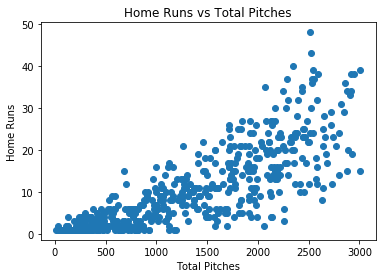

In [101]:
plt.scatter(df_knn["total_pitches"], df_knn["home_runs"])
plt.xlabel("Total Pitches")
plt.ylabel("Home Runs")
plt.title("Home Runs vs Total Pitches")
plt.show()

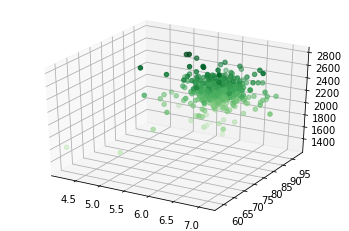

In [103]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')
zdata = df_knn["spin_rate"]
xdata = df_knn["release_extension"]
ydata = df_knn["velocity"]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')
plt.show()

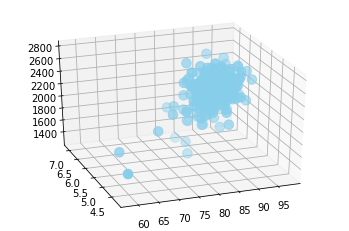

In [104]:
fig =  plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(df_knn["velocity"], df_knn["release_extension"], df_knn["spin_rate"], c="skyblue", s = 90)
ax.view_init(30,250)
plt.show()